In [1]:
## Plot Velocity Map for the whole Galapagos Islands
import os
import matplotlib.pyplot as plt
from pysar.simulation.plot import *
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp, utils as ut
from pysar import view

work_dir = '~/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE'
work_dir = os.path.expanduser(work_dir)
os.chdir(work_dir)
print('Go to directory: '+work_dir)
print_msg = False

## Prepare Data File
generate_masked_dem = False
if generate_masked_dem:
    cmd = 'load_hdf5.py ../../DEM/demLat_S02_N01_Lon_W092_W090.dem.wgs84 -o dem.h5 --data-type np.float32\n'
    cmd += 'generate_mask.py dem.h5 -m 0.5 -o demWaterMask.h5\n'
    cmd += 'mask.py dem.h5 -m demWaterMask.h5'
    print(cmd)
    os.system(cmd)

generate_velocity = False
if generate_velocity:
    cmd = 'subset.py geo_velocity_masked.h5 -r dem.h5 -o velocity_masked.h5 --outfill NaN'
    print(cmd)
    os.system(cmd)

proj_name = sensor.project_name2sensor_name(work_dir)[1]
out_file = 'velocity_{}.png'.format(proj_name)
print('Done.')

Go to directory: /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR/GEOCODE
Done.


/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


view.py velocity_masked.h5 velocity --mask no --sub-lat -1.2 0.2 --sub-lon -91.7 -90.75 -c jet --wrap --wrap-range -3 7 --nocbar --dem dem_masked.h5 --dem-nocontour --lalo-label --scalebar 0.3 0.8 0.03 --notitle --fontsize 12 


/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/yunjunz/development/python/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


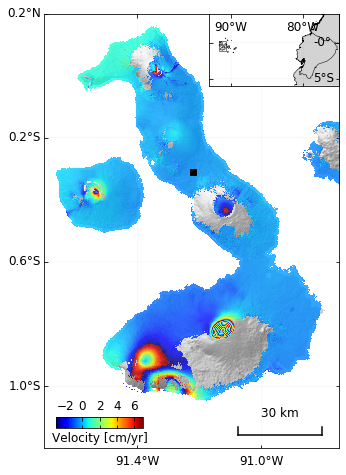

In [31]:
## plot velocity with functions from pysar/view.py
geo_box = (-91.7, 0.2, -90.75, -1.2)    # WNES
cmd = 'view.py velocity_masked.h5 velocity --mask no --sub-lat {S} {N} --sub-lon {W} {E} '.format(W=geo_box[0],
                                                                                                  N=geo_box[1],
                                                                                                  E=geo_box[2],
                                                                                                  S=geo_box[3])
cmd += '-c jet --wrap --wrap-range -3 7 --nocbar '
cmd += '--dem dem_masked.h5 --dem-nocontour '
cmd += '--lalo-label --scalebar 0.3 0.8 0.03 --notitle --fontsize 12 '
print(cmd)
inps = view.cmd_line_parse(cmd.split()[1:])
inps, atr = view.check_input_file_info(inps, print_msg=print_msg)
inps = view.update_inps_with_file_metadata(inps, atr, print_msg=print_msg)
data, atr = view.readfile.read(inps.file,
                               datasetName=inps.dset[0],
                               box=inps.pix_box,
                               print_msg=print_msg)
data, inps = view.update_data_with_plot_inps(data, atr, inps, print_msg=print_msg)

fig, ax = plt.subplots(figsize=[6, 8])
ax, inps, im = view.plot_2d_matrix(ax, data, atr, inps, print_msg=print_msg)[0:3]


# colorbar
cax = fig.add_axes([0.2, 0.16, 0.2, 0.02])
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.ax.xaxis.tick_top()
#cbar.ax.xaxis.set_label_position('top') 
cbar.ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True)
cbar.set_label('Velocity [cm/yr]', fontsize=font_size)
#cbar.ax.set_ylabel('10 cm/cycle', rotation=0, fontsize=font_size)
#cbar.ax.yaxis.set_label_position("right")

# insert location map
ax2 = fig.add_axes([0.554, 0.717, 0.3, 0.2])
geo_box_loc = (-93, 4, -75, -6)  # WNES
m = pp.BasemapExt(llcrnrlon=geo_box_loc[0], llcrnrlat=geo_box_loc[3],
                  urcrnrlon=geo_box_loc[2], urcrnrlat=geo_box_loc[1],
                  projection='cyl',
                  resolution='h',
                  suppress_ticks=False, ax=ax2)
m.fillcontinents(color='lightgray')
m.drawcountries()
m.drawcoastlines(linewidth=0.5)
m.draw_lalo_label(geo_box_loc, ax=ax2,
                  lalo_step=[5, 10],
                  labels=[0, 1, 1, 0],
                  xoffset=-3.6, yoffset=-2.8,
                  font_size=font_size,
                  print_msg=print_msg)
# plot AOI box
W, N, E, S = geo_box
ax2.plot([W, E, E, W, W], [N, N, S, S, N], linewidth=0.5, color='k')

## save to jpg file
fig.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()